# Importing the corpus


In [1]:
import pickle
from collections import Counter
from googletrans import Translator  # Import Translator module from googletrans package
import _dynet as dy
import re

# train_data = pickle.load(open("train_data.pkl", "rb"))
# test_data = pickle.load(open("test_data.pkl", "rb"))
# val_data = pickle.load(open("val_data.pkl", "rb"))

In [2]:
def createCorpus():
    corpus_it_italian=[]
    corpus_en_italian=[]
    puncList = [".",";",":","!","?","/","\\",",","#","@","$","&",")","(","\"","..."]
    i=0
    with open ("train_it_italian.it", "r",encoding="utf8") as myfile:
        for line in myfile:
            sentence=[]
            for word in line.split(" "):
                word=word.replace("\n","")
                if(word not in puncList):
                    if word.replace('.','',1).isdigit():
                        word="DIG"
                    sentence.append(word) 
            corpus_it_italian.append(sentence)



    with open ("train_en_italian.en", "r",encoding="utf8") as myfile:
        for line in myfile:
            sentence=[]
            for word in line.split(" "):
                word=word.replace("\n","")
                if(word not in puncList):
                    if word.replace('.','',1).isdigit():
                        word="DIG"
                    word=re.sub(r'[^\w\s]','',word)

                    sentence.append(word) 
            corpus_en_italian.append(sentence)

    with open('corpus_en_italian.pkl', 'wb') as f:
        pickle.dump(corpus_en_italian, f)
    with open('corpus_it_italian.pkl', 'wb') as f:
        pickle.dump(corpus_it_italian, f)
    
    return corpus_en_italian, corpus_it_italian

In [3]:
# corpus_en_italian, corpus_it_italian = createCorpus()
corpus_en_italian = pickle.load(open("corpus_en_italian.pkl", "rb"))
corpus_it_italian = pickle.load(open("corpus_it_italian.pkl", "rb"))

# Building the dictionary for word2Vec

In [5]:
from gensim.models import word2vec

In [6]:
def createW2V():
    model_en_italian=word2vec.Word2Vec(corpus_en_italian,min_count=1)
    model_it_italian=word2vec.Word2Vec(corpus_it_italian,min_count=1)

    with open('model_en_italian.pkl', 'wb') as f:
        pickle.dump(model_en_italian, f)
    with open('model_it_italian.pkl', 'wb') as f:
        pickle.dump(model_it_italian, f)
    
    return model_en_italian, model_it_italian

In [7]:
# model_en_italian, model_it_italian = createW2V()
model_en_italian = pickle.load(open("model_en_italian.pkl", "rb"))
model_it_italian = pickle.load(open("model_it_italian.pkl", "rb"))

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [9]:
X_it = model_it_italian[model_it_italian.wv.vocab]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [10]:
X_en = model_en_italian[model_en_italian.wv.vocab]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# PCA and Visualization

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result_it_pca = pca.fit_transform(X_it)

In [12]:
pca = PCA(n_components=2)
result_en_pca = pca.fit_transform(X_en)

cane
gatto
uomo


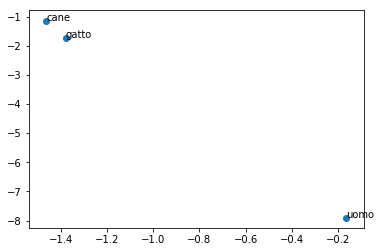

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#FRENCH
# create a scatter plot of the projection
index_it=[list(model_it_italian.wv.vocab).index("cane"),list(model_it_italian.wv.vocab).index("gatto"),list(model_it_italian.wv.vocab).index("uomo")]
result_it=np.array([result_it_pca[i] for i in index_it])
plt.scatter(-result_it[:, 0],-result_it[:, 1])
it_words = [ list(model_it_italian.wv.vocab)[i] for i in index_it]
for i, word in enumerate(it_words):
    print(word)
    plt.annotate(word, xy=(-result_it[i, 0], -result_it[i, 1]))
plt.show()

cat
dog
human


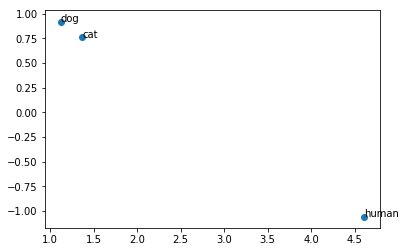

In [14]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en_italian.wv.vocab).index("cat"),list(model_en_italian.wv.vocab).index("dog"),list(model_en_italian.wv.vocab).index("human")]
result_en=np.array([result_en_pca[i] for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en_italian.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
plt.show()

# Reducing Objective Function

In [15]:
all_word = []
english_vocab = set()
for sentence in corpus_en_italian:
    for word in sentence:
        all_word.append(word)
        english_vocab.add(word)
        
italian_vocab = set()
for sentence in corpus_it_italian:
    for word in sentence:
        italian_vocab.add(word)
        
counts = Counter(all_word)
common_vocab = set()
train_vocab = set()
for word in counts.most_common(70000):
    common_vocab.add(word[0])
for word in counts.most_common(10000):
    train_vocab.add(word[0])

# Create Pairs of English-Italian Tuples

In [16]:
def generateWordPairs():
#     word_pairs_it = []
#     word_pairs_smaller_it = []
    
    word_pairs_it = pickle.load(open("word_pairs_it.pkl", "rb"))
    word_pairs_smaller_it = pickle.load(open("word_pairs_smaller_it.pkl", "rb"))

    count = 0
    for word in english_vocab:
        if count == 1000:
            break
        print(count)
        count += 1
        translator = Translator()
        italian_word = translator.translate(word,src="en",dest="it").text
        if italian_word in italian_vocab:
            word_pairs_it.append((word, italian_word))
            if italian_word != word:
                word_pairs_smaller_it.append((word, italian_word))

    with open('word_pairs_it.pkl', 'wb') as f:
        pickle.dump(word_pairs_it, f)
    with open('word_pairs_smaller_it.pkl', 'wb') as f:
        pickle.dump(word_pairs_smaller_it, f)
    
    return word_pairs_it, word_pairs_smaller_it

In [17]:
# word_pairs_it, word_pairs_smaller_it = generateWordPairs()
word_pairs_it = pickle.load(open("word_pairs_it.pkl", "rb"))
word_pairs_smaller_it = pickle.load(open("word_pairs_smaller_it.pkl", "rb"))

# Improved Method  -----This is the method for generating transformation matrix, make sure to run all code above this

In [24]:
DIMM = X_en.shape[1]
HIDDEN = 1000

In [37]:
training_tuples = pickle.load(open("training_tuples.pkl", "rb"))

In [39]:
training_tuples

{('instigating', 'istigazione'),
 ('Hannan', 'Hannan'),
 ('Esther', 'Esther'),
 ('Kroes.', 'Kroes.'),
 ('visa,', 'Visa,'),
 ('Gaubert,', 'Gaubert,'),
 ('―', '-'),
 ('thinkers', 'pensatori'),
 ('executing', 'esecuzione'),
 ('copies.', 'copie.'),
 ('inflation;', 'inflazione;'),
 ('bending', 'curvatura'),
 ('waged', 'retribuito'),
 ('childbirth,', 'parto,'),
 ('accusation.', 'accusa.'),
 ('just.', 'appena.'),
 ('Algiers', 'Algeri'),
 ('plasticisers', 'plastificanti'),
 ('recommending.', 'raccomandare.'),
 ('Eighth,', 'Ottavo,'),
 ('character,', 'carattere,'),
 ('18-19', '18-19'),
 ('penalty.', 'pena.'),
 ('ratify', 'ratificare'),
 ('Bochum', 'Bochum'),
 ('remits', 'competenze'),
 ('TBVI', 'TBVI'),
 ('sharia', 'sharia'),
 ('Kiev.', 'Kiev.'),
 ('Bahamas', 'Bahamas'),
 ('1a,', '1a,'),
 ('erosion', 'erosione'),
 ('addictive.', 'dipendenza.'),
 ('perhaps?', 'Forse?'),
 ('expressions.', 'espressioni.'),
 ('traditional,', 'tradizionale,'),
 ('examining', "l'esame"),
 ('taking,', 'prendendo,'),
 

In [25]:
def generateTransormMatImproved():
    
    training_tuples = pickle.load(open("training_tuples.pkl", "rb"))

    dyparams = dy.DynetParams()
    dyparams.set_mem(2048)
    dyparams.set_autobatch(True)
    dyparams.init()

    # create a parameter collection and add the parameters.
    m = dy.ParameterCollection()
#     pW = m.add_parameters((HIDDEN,DIMM))
    pW = m.add_parameters((DIMM,DIMM))
    pb = m.add_parameters((HIDDEN))
    pC = m.add_parameters((DIMM,HIDDEN))

    dy.renew_cg() # new computation graph. not strictly needed here, but good practice.

    # associate the parameters with cg Expressions
    W = dy.parameter(pW)
    b = dy.parameter(pb)
    C = dy.parameter(pC)

    x = dy.vecInput(DIMM) # an input vector of size 2. Also an expression.
    y = dy.vecInput(DIMM)
#     output = C*(W*x + b)
    output = W*x
    
    SIZE = 10000

    trainer = dy.AdagradTrainer(m)

    en_list = list(model_en_italian.wv.vocab)
    it_list = list(model_it_italian.wv.vocab)


    EPOCHS = 2

    words = np.random.choice(list(common_vocab),size=SIZE,replace=False)
    for epoch in range(EPOCHS):
        total_loss = 0
        seen_instances = 0
        for i,tup in enumerate(training_tuples):
            word_en = tup[0]
            word_it = tup[1]
#             translator = Translator()
#             word_it = translator.translate(word_en,src="en",dest="it").text
            if word_it not in italian_vocab:
                continue
                
#             training_tuples.add((word_en,word_it))
            
            en_emb = X_en[en_list.index(word_en)]
            it_emb = X_it[it_list.index(word_it)]

            en_emb /= np.linalg.norm(en_emb)
            it_emb /= np.linalg.norm(it_emb)

            x.set(en_emb)
            y.set(it_emb)
        
#             loss = 1 - dy.dot_product(output,y) / (dy.l2_norm(output) * dy.l2_norm(y)).value()
            
            loss = dy.squared_distance(output,y)
        
            seen_instances += 1
            total_loss += loss.value()
            
            
            loss.backward()
            trainer.update()
            
#             tmp = W.value()
#             u, s, vh = np.linalg.svd(tmp, full_matrices=True)
#             newW = np.dot(u,vh)
            
#             pW = m.add_parameters((DIMM,DIMM),init=dy.NumpyInitializer(newW))
#             W = dy.parameter(pW)

            
            if i % 100 == 0:
                print(total_loss / seen_instances)
                print(i)

    mat = W.value()
    matC = C.value()
    matB = b.value()
    
#     with open('training_tuples.pkl', 'wb') as f:
#         pickle.dump(training_tuples, f)
    
    return mat, matC, matB

In [26]:
mat, C, b = generateTransormMatImproved()

2.1369078159332275
0
2.641024958969343
100
2.105263235853679
200
1.8500008656337015
300
1.6449975168467164
400
1.5292665700831576
500
1.440929568151071
600
1.3650577548524623
700
1.3049504232503353
800
1.2601718876953263
900
1.2192487753146177
1000
1.1859210801465634
1100
1.158276759057021
1200
1.1382137980830385
1300
1.1130905710293684
1400
1.0932691079489316
1500
1.0725200348891444
1600
1.0572011048814116
1700
1.0433129001117163
1800
1.0279928530707978
1900
1.0181700525538198
2000
1.0035546657472836
2100
0.9946954547952707
2200
0.9856808360557564
2300
0.9754283587195783
2400
0.9678271586587075
2500
0.9597566699761695
2600
0.9514289031819652
2700
0.9439465084041029
2800
0.9374434783905796
2900
0.931258325197823
3000
0.9250380480454761
3100
0.9199480891544273
3200
0.9133807229872943
3300
0.9088611731246021
3400
0.9040305231748667
3500
0.9011354738268644
3600
0.8979508597257813
3700
0.8939384963874032
3800
0.8892036539733303
3900
0.8843994236229301
4000
0.881995822225103
4100
0.87961387

# Better Prediction Method -- this is the prediction method using transformation matrix

In [33]:
word_arr = np.array(list(model_it_italian.wv.vocab))
X_it_mag = np.sum(X_it**2,axis=1)**0.5
def predict_cosineSim(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
#     out = (np.dot(C,(np.dot(mat,en_emb.reshape((DIMM,1))) + np.array(b).reshape((HIDDEN,1))))).flatten()
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
#     translator = Translator()
#     french_word = translator.translate(word_en,src="en",dest="fr").text
    
    out_mag = np.sum(out**2)**0.5
    cos_sim = np.sum((X_it * out),axis=1)/(X_it_mag*out_mag)
    return list(word_arr[np.argsort(cos_sim)[::-1][:topWords]])#, french_word

In [35]:
predict_cosineSim('pay',10)

['ottenerli',
 'versare',
 'scegliere.',
 'percepire',
 'concedergli',
 'esaudire',
 'provare',
 'provvedere',
 'fruire',
 'sostenerlo']

# Worse Prediction Method -- ignore this

In [30]:
word_arr = np.array(list(model_it_italian.wv.vocab))
def predict_closest(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
#     translator = Translator()
#     french_word = translator.translate(word_en,src="en",dest="fr").text
    
    return list(word_arr[np.argsort(np.sum((X_it - out) ** 2,axis=1))[:topWords]])#, french_word

In [31]:
predict_closest('fast',5)

['solidale?', 'fragile:', 'discernibili.', 'congeniale.', 'buia.']

# Accuracy of Model -- running this gets the accuracy -- not implemented correctly yet

In [32]:
test_sample = np.random.choice(list(train_vocab),size=3000,replace=False)

num_correct = 0
num_incorrect = 0

# test_tuple = pickle.load(open("test_tuple.pkl", "rb"))

for i, tup in enumerate(val_data):
    print(i)
    if i == 300:
        break
    
    word = tup[0]
    french_word = tup[1]
    
#     translator = Translator()
#     french_word = translator.translate(word,src="en",dest="fr").text
#     if french_word not in french_vocab or word == french_word or word[0].isupper():
#         continue
    output_list = predict_cosineSim(word,20)
    output_set = set(output_list)
    
#     test_tuple.add((word,french_word))
#     print(i)
    
    if french_word in output_set:
        num_correct += 1
        print('CORRECT:  ' + word)
    else:
#         flag = False
#         for word_fr in output_list:
#             if translator.translate(word_fr,src="fr",dest="en").text == word:
#                 num_correct += 1
#                 print('CORRECT:  ' + word)
#                 flag = True
#                 break
#         if not flag:
        num_incorrect += 1
        print('INCORRECT:  ' + word)

# with open('test_tuple.pkl', 'wb') as f:
#     pickle.dump(test_tuple, f)

acc = num_correct / (num_correct + num_incorrect)
print(acc)

NameError: name 'val_data' is not defined

In [ ]:
# 46.33% -- Accuracy achieved with part 1's transformation matrix
# 47% -- baseline, with normalization

# 43% -- 500
# 44% -- 1000